**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in lines 131 through 143 of the file called [`helper_functions.py`](https://github.com/ikcGitHub/CarND-Vehicle-Detection/blob/master/helper_functions.py).  

I started by reading in all the `vehicle` and `non-vehicle` images.  

Then I randomly picked an image from each classes and experienced with them.
I explored HOG feature extraction on the same image with different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).


| Parameters name  | First set | Second set | Third set |
| ------------- | ------------- | ------------- | ------------- |
| Orientation  | 9  | 9 | 9 |
| Pixels per cell  | 8  | 4 | 16 |
| Cells per block  | 2  | 2 | 2 |
| Visualize  | True  | True | True |
| Feature vector  | False  | False | False |


Then I tried spatial binning and color histogram in different color spaces


| Parameters name  | First set | Second set | Third set | Fourth set |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Color spaces  | 'RGb'  | 'RGB' | 'HLS' | 'YCrCb' |
| Spatial size  | (32, 32)  | (32, 32) | (32, 32) | (32, 32) |
| Histogram bins  | 32  | 32 | 32 | 32 |
| Histogram range  | (0, 256)  | (0, 256) | (0, 256) | (0, 256) |



__Import libraries__

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

__Import functions__

In [ ]:
from helper_functions import data_look

__Initialization__

In [ ]:
# Images are in PNG format and divided into vehichles and non-vehicles
vehicles_images = glob.glob('./training_dataset/vehicles/*/*.png')
non_vehicles_images = glob.glob('./training_dataset/non-vehicles/*/*.png')

vehicles_all = []
non_vehicles_all = []

__Reading all images__

In [ ]:
for image in vehicles_images:
    vehicles_all.append(image)

for image in non_vehicles_images:
    non_vehicles_all.append(image)

# Shuffle image data
random.shuffle(vehicles_all)
random.shuffle(non_vehicles_all)

# Take the first 100 images for testing
vehicles_test = vehicles_all[:4000]
non_vehicles_test = non_vehicles_all[:4000]

# Store some characteristics of the dataset
data_info_test = data_look(vehicles_test, non_vehicles_test)

print('Your function returned a count of', 
      data_info_test["n_vehicles"], ' vehicles and', 
      data_info_test["n_non_vehicles"], ' non-vehicles')
print('of size: ',data_info_test["image_shape"], ' and data type:', 
      data_info_test["data_type"])

__Plot one sample image from each classes__

In [ ]:
# Return a random index within range of the minimum length in both lists
idx_max = np.minimum(data_info_test["n_vehicles"], data_info_test["n_non_vehicles"])
idx_random = np.random.randint(0, idx_max)
print("Current random index is", idx_random)

# Read in vehicles / non-vehicles images
vehicle_image_test = mpimg.imread(vehicles_test[idx_random])
non_vehicle_image_test = mpimg.imread(non_vehicles_test[idx_random])

# Plot the examples
f, axs = plt.subplots(1, 2, figsize=(30, 15))
axs = axs.ravel()

axs[0].imshow(vehicle_image_test)
axs[0].set_title('Example Vehicle Image', fontsize = 20)

axs[1].imshow(non_vehicle_image_test)
axs[1].set_title('Example Non-vehicle Image', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0., right=0.4, top=0.9, bottom=0.)

__Apply HOG with different parameters__

__Import functions__

In [ ]:
from helper_functions import get_hog_features

__Define parameters__

In [ ]:
# Define HOG parameters
# First set
orient = 9
pix_per_cell = 8
cell_per_block = 2
vis = True
feature_vec = False

# Second set
orient_2 = 9
pix_per_cell_2 = 4
cell_per_block_2 = 2
vis_2 = True
feature_vec_2 = False

# Third set
orient_3 = 9
pix_per_cell_3 = 16
cell_per_block_3 = 2
vis_3 = True
feature_vec_3 = False

__Covert to grayscale__

In [ ]:
# Convert to grayscale
gray_vehicle_test = cv2.cvtColor(vehicle_image_test, cv2.COLOR_RGB2GRAY)
gray_non_vehicle_test = cv2.cvtColor(non_vehicle_image_test, cv2.COLOR_RGB2GRAY)

__Return HOG features and visualization__

In [ ]:
# Return HOG features and visualization
# First set
features_vehicle, hog_image_vehicle = get_hog_features(gray_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

features_non_vehicle, hog_image_non_vehicle = get_hog_features(gray_non_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

# Second set
features_vehicle_2, hog_image_vehicle_2 = get_hog_features(gray_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

features_non_vehicle_2, hog_image_non_vehicle_2 = get_hog_features(gray_non_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

# Third set
features_vehicle_3, hog_image_vehicle_3 = get_hog_features(gray_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

features_non_vehicle_3, hog_image_non_vehicle_3 = get_hog_features(gray_non_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

__Plot images__

In [ ]:
# Plot the examples
f, axs = plt.subplots(2, 4, figsize=(30, 30))
axs = axs.ravel()

axs[0].imshow(gray_vehicle_test)
axs[0].set_title('Grayscale Vehicle Image', fontsize = 20)

axs[1].imshow(hog_image_vehicle)
axs[1].set_title('HOG Visualization Vehicle Image', fontsize = 20)

axs[2].imshow(hog_image_vehicle_2)
axs[2].set_title('HOG Visualization Vehicle Image 2', fontsize = 20)

axs[3].imshow(hog_image_vehicle_3)
axs[3].set_title('HOG Visualization Vehicle Image 3', fontsize = 20)

axs[4].imshow(gray_non_vehicle_test)
axs[4].set_title('Grayscale Non-Vehicle Image', fontsize = 20)

axs[5].imshow(hog_image_non_vehicle)
axs[5].set_title('HOG Visualization Non-vehicle Image', fontsize = 20)

axs[6].imshow(hog_image_non_vehicle_2)
axs[6].set_title('HOG Visualization Non-vehicle Image 2', fontsize = 20)

axs[7].imshow(hog_image_non_vehicle_3)
axs[7].set_title('HOG Visualization Non-vehicle Image 3', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

__Apply spatial binning and color histogram in different color spaces__

__Import libraries__

In [ ]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

__Import functions__

In [ ]:
from helper_functions import extract_features_bin_spatial_hist, plot3d

__Define parameters__

In [ ]:
# RGB
color_space = 'RGB'
spatial_size=(32, 32)
hist_bins=32
hist_range=(0, 256)

# HSV
color_space_2 = 'RGB'
spatial_size_2 = (32, 32)
hist_bins_2 = 32
hist_range_2 = (0, 256)

# HLS
color_space_3 = 'HLS'
spatial_size_3 = (32, 32)
hist_bins_3 = 32
hist_range_3 = (0, 256)

# YCrCb
color_space_4 = 'YCrCb'
spatial_size_4 = (32, 32)
hist_bins_4 = 32
hist_range_4 = (0, 256)

__Return spatial binning of color features__

In [ ]:
# RGB
features_bin_spatial_hist_vehicle = extract_features_bin_spatial_hist(vehicles_test, color_space, spatial_size,
                        hist_bins, hist_range)

features_bin_spatial_hist_non_vehicle = extract_features_bin_spatial_hist(non_vehicles_test, color_space, spatial_size,
                        hist_bins, hist_range)

# HSV
features_bin_spatial_hist_vehicle_2 = extract_features_bin_spatial_hist(vehicles_test, color_space_2, spatial_size_2,
                        hist_bins_2, hist_range_2)

features_bin_spatial_hist_non_vehicle_2 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_2, spatial_size_2,
                        hist_bins_2, hist_range_2)

# HLS
features_bin_spatial_hist_vehicle_3 = extract_features_bin_spatial_hist(vehicles_test, color_space_3, spatial_size_3,
                        hist_bins_3, hist_range_3)

features_bin_spatial_hist_non_vehicle_3 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_3, spatial_size_3,
                        hist_bins_3, hist_range_3)

# YCrCb
features_bin_spatial_hist_vehicle_4 = extract_features_bin_spatial_hist(vehicles_test, color_space_4, spatial_size_4,
                        hist_bins_4, hist_range_4)

features_bin_spatial_hist_non_vehicle_4 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_4, spatial_size_4,
                        hist_bins_4, hist_range_4)

__Normalize feature vectors__

In [ ]:
# RGB
if len(features_bin_spatial_hist_vehicle) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((features_bin_spatial_hist_vehicle, features_bin_spatial_hist_non_vehicle)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
else: 
    print('Your function only returns empty feature vectors for RGB')
    
# HSV
if len(features_bin_spatial_hist_vehicle_2) > 0:
    # Create an array stack of feature vectors
    X_2 = np.vstack((features_bin_spatial_hist_vehicle_2, features_bin_spatial_hist_non_vehicle_2)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_2 = StandardScaler().fit(X_2)
    # Apply the scaler to X
    scaled_X_2 = X_scaler_2.transform(X_2)
else: 
    print('Your function only returns empty feature vectors for HSV')
    
# HLS
if len(features_bin_spatial_hist_vehicle_3) > 0:
    # Create an array stack of feature vectors
    X_3 = np.vstack((features_bin_spatial_hist_vehicle_3, features_bin_spatial_hist_non_vehicle_3)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_3 = StandardScaler().fit(X_3)
    # Apply the scaler to X
    scaled_X_3 = X_scaler_3.transform(X_3)
else: 
    print('Your function only returns empty feature vectors for HLS')
    
# YCrCb
if len(features_bin_spatial_hist_vehicle_4) > 0:
    # Create an array stack of feature vectors
    X_4 = np.vstack((features_bin_spatial_hist_vehicle_4, features_bin_spatial_hist_non_vehicle_4)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler_4 = StandardScaler().fit(X_4)
    # Apply the scaler to X
    scaled_X_4 = X_scaler_4.transform(X_4)
else: 
    print('Your function only returns empty feature vectors for YCrCb')

__Plot images__

In [ ]:
# Plot image

fig = plt.figure(figsize=(12,4))

# RGB
plt.subplot(241)
plt.plot(X[idx_random])
plt.title('Raw Features(RGB)')
plt.subplot(245)
plt.plot(scaled_X[idx_random])
plt.title('Normalized Features(RGB)')

# HSV
plt.subplot(242)
plt.plot(X_2[idx_random])
plt.title('Raw Features(HSV)')
plt.subplot(246)
plt.plot(scaled_X_2[idx_random])
plt.title('Normalized Features(HSV)')

# HLS
plt.subplot(243)
plt.plot(X_3[idx_random])
plt.title('Raw Features(HLS)')
plt.subplot(247)
plt.plot(scaled_X_3[idx_random])
plt.title('Normalized Features(HLS)')

# YCrCb
plt.subplot(244)
plt.plot(X_4[idx_random])
plt.title('Raw Features(YCrCb)')
plt.subplot(248)
plt.plot(scaled_X_4[idx_random])
plt.title('Normalized Features(YCrCb)')

fig.tight_layout()


__Plot image in 3D__

In [ ]:
# Read a color image
img = cv2.imread(vehicles_test[idx_random])
#img = cv2.imread("000275.png")
#img = mpimg.imread(vehicles[idx_random])

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
# RGB
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
# HSV
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
# HLS
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
# YCrCb
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)


# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
plt.show()

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and came up th following decision with explanation.
The documentation for `hog()` function can be found [here](http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature%20hog#skimage.feature.hog).

* For orientations, either 9 or 17 would be acceptable. I go with `orientation = 9`.
* For pixels_per_cell, smaller number will return more cells. For a 64 by 64 pixels picture, `pix per cell = 8` is good enough.
* For cells per block, either 2 or 4 would be good. I go with `cell_per_block = 2`.
* For visualize, I don't need the image return back in the following cells. Set `False` to it.
* For feature_vector, I need it to be a 1 demensional array for concatenating to other features. Therefore, set `True` to it.
* For multichannel, I am using `HLS` color space with `ALL` channels
___
__Final list__  
orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
multichannel_final = 'ALL'  


#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using the following features:
+ __Color features(spatial binning, color histogram)__  
color_space_final = 'HLS'  
spatial_size_final = (32, 32)  
hist_bins_final = 32  
hist_range_final = (0, 256)  
  
  
+ __HOG features__  
orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
multichannel_final = 'ALL'  
___
Here are the training steps:
+ Extract the specific features from the dataset
+ Normalie the extracted features vector
+ Define labels vector
+ Split up and randomize on both extracted features vector and labels vector
    - Return training dataset and test dataset
+ Create SVM
+ Fit the training dataset into SVM
+ Evaluate the accuracy of SVM
+ Predict the result with the test dataset
+ Done

__Import libraries__

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC
from sklearn import svm
import sklearn.model_selection as grid_search
from sklearn.cross_validation import train_test_split
# But, if you are using scikit-learn >= 0.18 then use this:
# from sklearn.model_selection import train_test_split

__Import functions__

In [ ]:
from helper_functions import extract_features_single_image

__Define parameters__

In [ ]:
# Define parameters
color_space_final = 'YUV'  
spatial_size_final = (16, 16)  
hist_bins_final = 16  
hist_range_final = (0, 256)  

orient_final = 9  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False # Hardcoded in the function extract_features_single_image()
feature_vec_final = True # Hardcoded in the function extract_features_single_image()
multichannel_final = "ALL"   # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

__Extract the specific features from the dataset__

In [ ]:
t1=time.time()

# Create a list to append feature vectors to

vehicle_features_all = []
augmented_vehicle_images = []

non_vehicle_features_all = []
augmented_non_vehicle_images = []

# Augmented data set
for vehicle_img_path in vehicles_all:
    # Read in vehicles
    vehicle_image = mpimg.imread(vehicle_img_path)
    augmented_vehicle_images.append(vehicle_image)
    augmented_vehicle_images.append(cv2.flip(vehicle_image,1))

print(len(augmented_vehicle_images))
counter = 0    
# Extract features from each images    
for vehicle_image in augmented_vehicle_images:
    # mpimg.imread will return reading .png format in on a scale of 0 to 1
    # We want the scale of 0 to 255 in extracting features
    # Scale up from (0, 1) to (0, 255)
    vehicle_image = vehicle_image * 255
    # Extract features from image
    single_image_features = extract_features_single_image(vehicle_image, color_space=color_space_final, spatial_size=spatial_size_final, 
                                                          hist_bins=hist_bins_final, hist_range=hist_range_final, orient=orient_final, 
                                                          pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, hog_channel=multichannel_final, 
                                                          spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
    # Append the new feature vector to the features list
    vehicle_features_all.append(single_image_features)
    counter+=1
#     print(counter)

t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract features from vehicle images.')

# Augmented data set
for non_vehicle_img_path in non_vehicles_all:
    # Read in vehicles
    non_vehicle_image = mpimg.imread(non_vehicle_img_path)
    augmented_non_vehicle_images.append(non_vehicle_image)
    augmented_non_vehicle_images.append(cv2.flip(non_vehicle_image,1))

print(len(augmented_non_vehicle_images))
counter = 0        
# Extract features from each images
for non_vehicle_image in augmented_non_vehicle_images:
    # mpimg.imread will return reading .png format in on a scale of 0 to 1
    # We want the scale of 0 to 255 in extracting features
    # Scale up from (0, 1) to (0, 255)
    non_vehicle_image = non_vehicle_image * 255
    # Extract features from image
    single_image_features = extract_features_single_image(non_vehicle_image, color_space=color_space_final, spatial_size=spatial_size_final, 
                                                          hist_bins=hist_bins_final, hist_range=hist_range_final, orient=orient_final, 
                                                          pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, hog_channel=multichannel_final, 
                                                          spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
    # Append the new feature vector to the features list
    non_vehicle_features_all.append(single_image_features)
    counter+=1
#     print(counter)

t3 = time.time()
print(round(t3-t2, 2), 'Seconds to extract features from non-vehicle images.')

In [ ]:
print(len(vehicle_features_all))

print(len(non_vehicle_features_all))


__Normalie the extracted features vector__

In [ ]:
# Normalize
if len(vehicle_features_all) > 0:
    # Create an array stack of feature vectors
    X_final = np.vstack((vehicle_features_all, non_vehicle_features_all)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler_final = StandardScaler().fit(X_final)
    # Apply the scaler to X
    scaled_X_final = X_scaler_final.transform(X_final)
else: 
    print('Your function only returns empty feature vectors for RGB')

__Define labels vector__

In [ ]:
# Define the labels vector
y_final = np.hstack((np.ones(len(vehicle_features_all)), 
               np.zeros(len(non_vehicle_features_all))))

__Split up and randomize on both extracted features vector and labels vector__

In [ ]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X_final, y_final, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial_size_final,
    'and', hist_bins_final,'histogram bins')
print('Feature vector length:', len(X_train[0]))

__Create SVM__

In [ ]:
# Apply GridSearchCV to SVM
# parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 1]}
# parameters = {'kernel':['linear'], 'C':[0.01, 1]}
parameters = {'kernel':['linear'], 'C':[0.01]}
svr = svm.SVC()

In [ ]:
# # Use a linear SVC 
# svc = LinearSVC()

__Fit the training dataset into SVM__

In [ ]:
# # Check the training time for the SVC
# t=time.time()
# svc.fit(X_train, y_train)
# t2 = time.time()
# print(round(t2-t, 2), 'Seconds to train SVC...')

In [ ]:
# Check the training time for the SVC
t=time.time()
# svc.fit(X_train, y_train)

# Train the classifier
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

In [ ]:
# Return best fitted classifier

# The fit function now tries all the parameter combinations, 
# and returns a fitted classifier that's automatically tuned to the optimal parameter combination. 
# You can now access the parameter values via clf.best_params_
print('Optimal parameter combination is ', clf.best_params_)

In [ ]:
svc = clf

__Evaluate the accuracy of SVM__

In [ ]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

In [ ]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

__Predict the result with the test dataset__

In [ ]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search window at different scale at `(64, 64)` `(96, 96)` and overlap at `(0.5, 0.5)` based on the experiment below. The code below is used to evaluate the performance of different combination of window scale and overlap value.  
From the final result, I come up the following conclusions:
* Larger overlap will result in more match windows
* Less overlap will result in less match window, nevertheless, not good for the following steps "add heat" and "filter".
* Smaller window will give you more match windows to analyze
* Bigger window will result less overlap, not good for the following steps "add heat" and "filter".

I explored sliding window search on the same image with different parameteres.


| Parameters name | First set | Second set | Third set | Fourth set | Fifth set |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Window size | (64, 64) | (64, 64) | (64, 64) | (32, 32) | (96, 96) |
| Window overlap | (0.5, 0.5)  | (0.2, 0.2) | (0.8, 0.8) | (0.5, 0.5) | (0.5, 0.5) |


__Import functions__

In [ ]:
from helper_functions import slide_window, search_windows, draw_boxes

__Read in test image__

In [ ]:
image = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

__Define Parameters__

In [ ]:
y_max = image.shape[0]
y_start_stop = [np.int(y_max/2), y_max] # Min and max in y to search in slide_window()

# First set
xy_window_1 = (64, 64)
xy_overlap_1 = (0.5, 0.5)

# Second set
xy_window_2 = (64, 64)
xy_overlap_2 = (0.2, 0.2)

# Third set
xy_window_3 = (64, 64)
xy_overlap_3 = (0.8, 0.8)

# Fourth set
xy_window_4 = (32, 32)
xy_overlap_4 = (0.5, 0.5)

# Fifth set
xy_window_5 = (96, 96)
xy_overlap_5 = (0.5, 0.5)

__Search windows__

In [ ]:
# First set
windows_1 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_1, xy_overlap=xy_overlap_1)

hot_windows_1 = search_windows(image, windows_1, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, hist_range = hist_range_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_1 = draw_boxes(draw_image, hot_windows_1, color=(0, 0, 255), thick=6)

# Second set
windows_2 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_2, xy_overlap=xy_overlap_2)

hot_windows_2 = search_windows(image, windows_2, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, hist_range = hist_range_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_2 = draw_boxes(draw_image, hot_windows_2, color=(0, 0, 255), thick=6)

# Third set
windows_3 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_3, xy_overlap=xy_overlap_3)

hot_windows_3 = search_windows(image, windows_3, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, hist_range = hist_range_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_3 = draw_boxes(draw_image, hot_windows_3, color=(0, 0, 255), thick=6)

# Fourth set
windows_4 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_4, xy_overlap=xy_overlap_4)

hot_windows_4 = search_windows(image, windows_4, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, hist_range = hist_range_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_4 = draw_boxes(draw_image, hot_windows_4, color=(0, 0, 255), thick=6)

# Fifth set
windows_5 = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window_5, xy_overlap=xy_overlap_5)

hot_windows_5 = search_windows(image, windows_5, svc, X_scaler_final, color_space=color_space_final, 
                        spatial_size=spatial_size_final, hist_bins=hist_bins_final, hist_range = hist_range_final, 
                        orient=orient_final, pix_per_cell=pix_per_cell_final, 
                        cell_per_block=cell_per_block_final, 
                        hog_channel=multichannel_final, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img_5 = draw_boxes(draw_image, hot_windows_5, color=(0, 0, 255), thick=6)


__Plot images__

In [ ]:
# Plot the examples
f, axs = plt.subplots(2, 3, figsize=(36, 24))
axs = axs.ravel()

axs[0].imshow(window_img_1)
axs[0].set_title('xy_window=(64,64) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[1].imshow(window_img_2)
axs[1].set_title('xy_window=(64,64) xy_overlap=(0.2,0.2)', fontsize = 20)

axs[2].imshow(window_img_3)
axs[2].set_title('xy_window=(64,64) xy_overlap=(0.8,0.8)', fontsize = 20)

axs[3].imshow(window_img_1)
axs[3].set_title('xy_window=(64,64) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[4].imshow(window_img_4)
axs[4].set_title('xy_window=(32,32) xy_overlap=(0.5,0.5)', fontsize = 20)

axs[5].imshow(window_img_5)
axs[5].set_title('xy_window=(96,96) xy_overlap=(0.5,0.5)', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on multiple scales using HLS 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result. Those features extraction, classifying and window drawing were implemented in the function `find_cars()`. To enhance the efficiency of classifying, there are few code in `find_cars()` to extract HOG features just once for the entire region of interest in each full image / video frame. Please refer to the below images for your reference.

__Import functions__

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

In [2]:
import pickle
from helper_functions import convert_color, find_cars
# from helper_functions import convert_color, bin_spatial, color_hist, get_hog_features

In [3]:
from skimage.feature import hog

__Read in test images__

In [4]:
# Images are in JPEG format
test_images = glob.glob('./test_images/*.jpg')

# Creat a list to store the file paths
test_images_all = []
for image in test_images:
    test_images_all.append(image)

__Define parameters__

In [ ]:
# ystart = 400
# ystop = 656
# scale = 1.5

__Run the following code once a new classifier is created__

__Save a dictonary for future use__

In [ ]:
# # Create dictionary
# dict_vehicle_detection = {"svc": svc, 
#                           "X_scaler": X_scaler_final, 
#                           "orient": orient_final, 
#                           "pix_per_cell": pix_per_cell_final, 
#                           "cell_per_block": cell_per_block_final, 
#                           "feature_vec": feature_vec_final, 
#                           "spatial_size": spatial_size_final, 
#                           "hog_channel": multichannel_final, 
#                           "hist_bins": hist_bins_final, 
#                           "hist_range": hist_range_final, 
#                           "spatial_feat": spatial_feat, 
#                           "hist_feat": hist_feat, 
#                           "hog_feat": hog_feat,
#                           "ystart": ystart,
#                           "ystop": ystop,
#                           "scale": scale
#                          }

# # Save dictionary
# pickle.dump(dict_vehicle_detection, open('dict_vehicle_detection.p', 'wb'))

__Load data file__

In [5]:
# Load dictionary

# dict_pickle = pickle.load(open('dict_vehicle_detection.p', 'rb'))
# path_classifier = './classifiers/YCrCb_ALL_HOG_9_8_2.p'
path_classifier = './classifiers/YCrCb_9_8_2_good_1.p'
dict_pickle = pickle.load(open(path_classifier, 'rb'))

# Read data
svc = dict_pickle["svc"]
X_scaler = dict_pickle["X_scaler"]
orient = dict_pickle["orient"]
pix_per_cell = dict_pickle["pix_per_cell"]
cell_per_block = dict_pickle["cell_per_block"]
hog_channel = dict_pickle["hog_channel"]
spatial_size = dict_pickle["spatial_size"]
hist_bins = dict_pickle["hist_bins"]
hist_range = dict_pickle["hist_range"]
ystart = dict_pickle["ystart"]
ystop = dict_pickle["ystop"]
scale = dict_pickle["scale"]

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


__Find cars in image__

In [6]:
# Initialize an empty list
list_out_img = []
list_windows = []

# Scan for window scale (96, 96) and cells per step 8

for img_path in test_images_all:
    # Read image
    img = mpimg.imread(img_path)    
    print(img_path)
    
    window_size = 64
    cell_per_step = 2
    pix_per_cell = 8 # Change pixe per cell to make the total number of block positions = 8
    ystart = 350
    ystop = 600

    # copy image for sliding window search
    draw_img = np.copy(img)
    out_img = img

    sublist_out_img =[]
    sublist_windows =[]
    hstack = []

    for scale in np.arange(1.0, 2.6, 0.2):
        print(scale)
        out_img, list_windows = find_cars(out_img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)
        if 0 == len(list_windows):
            hstack = hstack
        else:
            print(list_windows)
            if [] == hstack:
                hstack = list_windows
            else:
                hstack = np.vstack((hstack, list_windows))

    list_out_img.append(out_img)
    list_windows.append(hstack)

./test_images\test1.jpg
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
./test_images\test2.jpg
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
./test_images\test3.jpg
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
./test_images\test4.jpg
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
./test_images\test5.jpg
1.0
1.2
[((614, 503), (690, 579)), ((614, 522), (690, 598)), ((633, 522), (709, 598)), ((652, 522), (728, 598)), ((748, 503), (824, 579))]
1.4
[((627, 484), (716, 573)), ((627, 506), (716, 595)), ((649, 506), (738, 595))]
1.6
[((640, 477), (742, 579)), ((665, 477), (767, 579))]
1.8


C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


[((576, 465), (691, 580)), ((604, 436), (719, 551)), ((604, 465), (719, 580)), ((633, 436), (748, 551)), ((633, 465), (748, 580)), ((662, 436), (777, 551)), ((662, 465), (777, 580)), ((691, 436), (806, 551)), ((691, 465), (806, 580)), ((719, 436), (834, 551)), ((719, 465), (834, 580))]
2.0
2.2
2.4
[((537, 388), (690, 541)), ((537, 426), (690, 579)), ((575, 388), (728, 541)), ((575, 426), (728, 579)), ((614, 426), (767, 579)), ((652, 426), (805, 579))]
./test_images\test6.jpg
1.0
[((32, 446), (96, 510)), ((32, 494), (96, 558)), ((48, 462), (112, 526)), ((48, 478), (112, 542)), ((64, 494), (128, 558))]
1.2
[((38, 446), (114, 522)), ((38, 465), (114, 541)), ((57, 446), (133, 522)), ((57, 465), (133, 541)), ((57, 484), (133, 560))]
1.4
[((22, 439), (111, 528)), ((22, 462), (111, 551)), ((22, 484), (111, 573)), ((44, 439), (133, 528)), ((44, 462), (133, 551)), ((44, 484), (133, 573)), ((67, 462), (156, 551)), ((67, 484), (156, 573))]
1.6
[((51, 426), (153, 528)), ((51, 452), (153, 554)), ((

In [ ]:
# # The actual number of features in your final feature vector will be the total number of block positions multiplied by the number of cells per block, times the number of orientations, or in the case shown above: 
# # number of block positions = window size (pixels) / pixels per cell - 1
# # Example: 7 = 96/12 -1
# # 7×7×2×2×9=1764.

# # Initialize an empty list
# list_out_img = []
# list_windows = []

# for img_path in test_images_all:
#     # Read image
#     img = mpimg.imread(img_path)    
    
#     if 1:
#         # Scan for window scale (96, 96) and cells per step 8
#         window_size = 64
#         cell_per_step = 6
#         pix_per_cell = 8 # Change pixe per cell to make the total number of block positions = 8
#         ystart = 420
#         ystop = 580
#         scale = 1.5
#         # Find cars in the image
#         out_img_1, list_windows_1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)
#     else:
#         out_img_1 = img
#         list_windows_1 = []
#     # Scan for window scale (64, 64) and cells per step 4
#     window_size = 64
#     cell_per_step = 6
#     pix_per_cell = 8 # Change pixe per cell to make the total number of block positions = 8
#     ystart = 400
#     ystop = 540
#     scale = 0.8
#     # Find cars in the image
#     out_img_2, list_windows_2 = find_cars(out_img_1, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)
#     # Append the output image to the list 
#     list_out_img.append(out_img_2)
#     # Append the matched windows to the list 
# #     print(len(list_windows_1))
# #     print(len(list_windows_2))
#     if 0 == len(list_windows_1):
#         hstack = list_windows_2
#     elif 0 == len(list_windows_2):
#         hstack = list_windows_1
#     else:
#         hstack = np.vstack((list_windows_1, list_windows_2))
#     list_windows.append(hstack)

In [7]:
print(len(test_images_all))

6


__Plot some example images__

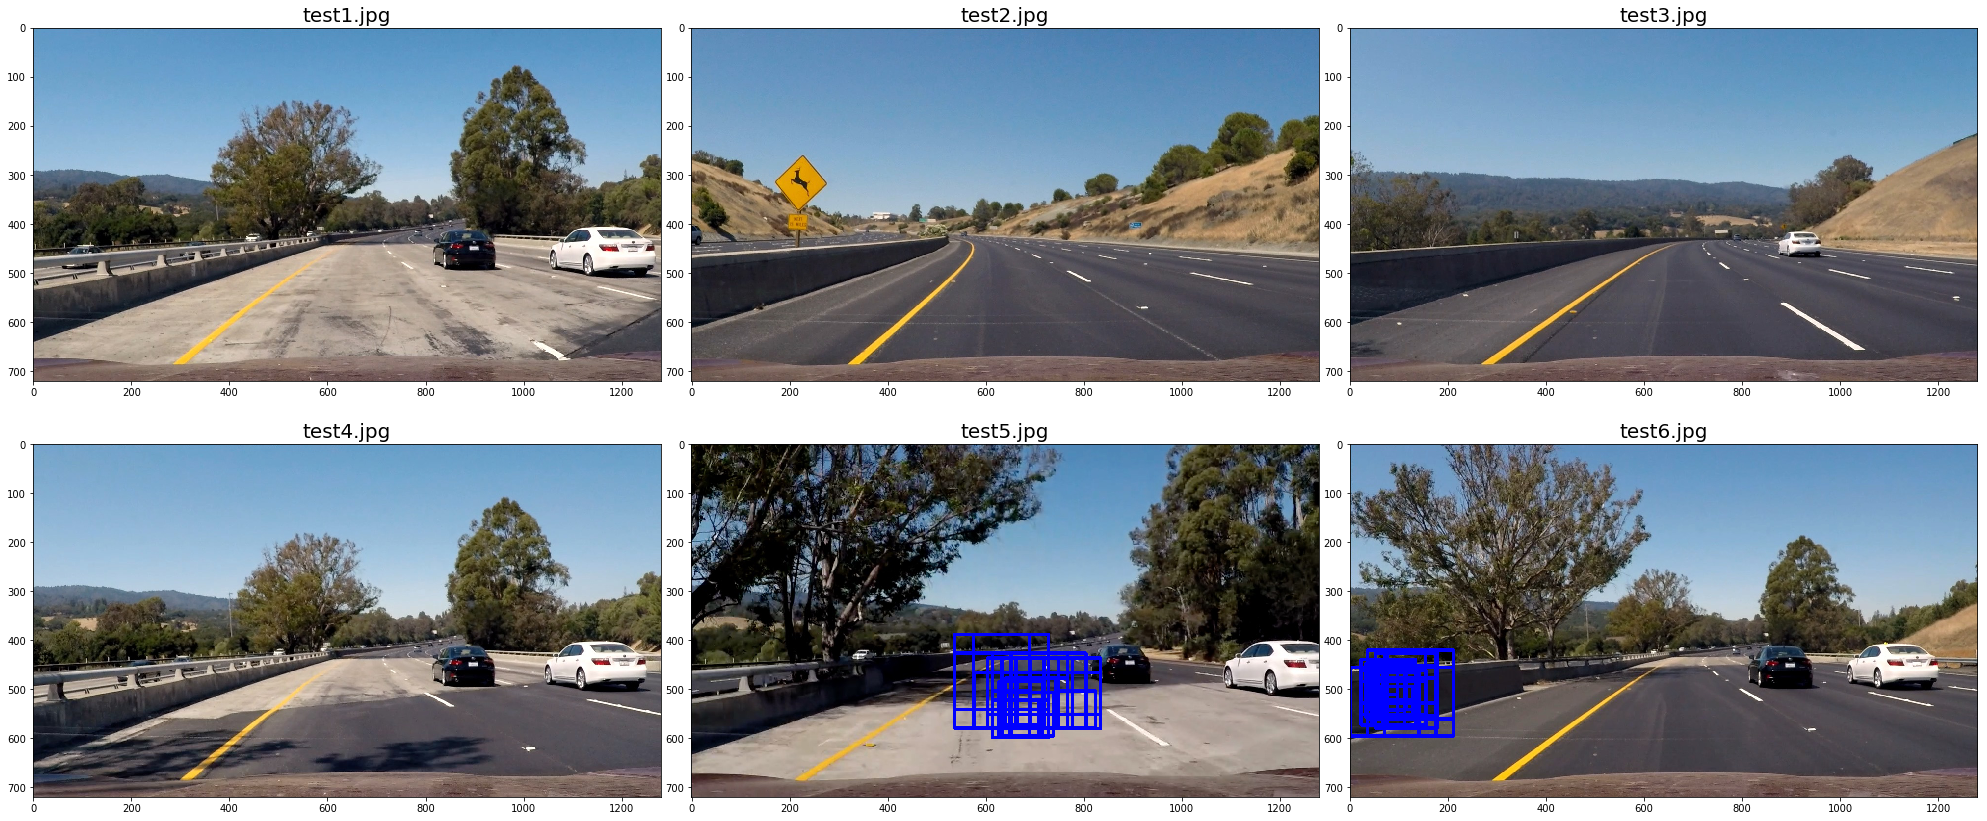

In [8]:
# Plot the examples
f, axs = plt.subplots(2, 3, figsize=(36, 24))
axs = axs.ravel()

for idx in range(len(list_out_img)):
    # Plot image
    axs[idx].imshow(list_out_img[idx])
    # Set title name
    title_name = test_images_all[idx].split('\\')[-1]
    axs[idx].set_title(title_name, fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./test_videos_output/project_video_output.mp4)

__Import Libraries__

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from collections import deque

n_frames = 12
heatmapes = deque(maxlen = n_frames)

#import numpy as np
from helper_functions import process_image

__Process Video__  
Test on the given video project_video.mp4

In [ ]:
video_output = 'test_videos_output/project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# clip1 = VideoFileClip("project_video.mp4").subclip(4,10)
# clip1 = VideoFileClip("project_video.mp4").subclip(4,15)
# clip1 = VideoFileClip("project_video.mp4").subclip(23,30)
# clip1 = VideoFileClip("project_video.mp4").subclip(23,38)
clip1 = VideoFileClip("project_video.mp4").subclip(4,20)
# clip1 = VideoFileClip("project_video.mp4")
video_output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!


%time video_output_clip.write_videofile(video_output, audio=False)

In [ ]:
# # Capture some images for processing
# video_output_clip.save_frame("./output_images/test_1/frame_1.png", t=0.1)
# video_output_clip.save_frame("./output_images/test_1/frame_2.png", t=0.2)
# video_output_clip.save_frame("./output_images/test_1/frame_3.png", t=0.3)
# video_output_clip.save_frame("./output_images/test_1/frame_4.png", t=0.4)
# video_output_clip.save_frame("./output_images/test_1/frame_5.png", t=0.5)
# video_output_clip.save_frame("./output_images/test_1/frame_6.png", t=0.6)

__Play Video Inline__

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the multiple scales position of positive detection in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Below are six drawn test images, their corresponding threshold images and the final heatmap.

__Import librarires__

In [ ]:
from scipy.ndimage.measurements import label

In [ ]:
from helper_functions import convert_color, bin_spatial, color_hist, get_hog_features, find_cars, draw_labeled_bboxes
import matplotlib.image as mpimg
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

% matplotlib inline

In [ ]:
import time

__Import functions__

In [ ]:
import glob
from helper_functions import add_heat, apply_threshold, draw_labeled_bboxes
from collections import deque

# n_frames = 12
# heatmapes = deque(maxlen = n_frames)

In [ ]:
# Images are in png format
test_series_images = glob.glob('./output_images/test_1/*.png')

# Creat a list to store the file paths
test_series_images_all = []
for image in test_series_images:
    test_series_images_all.append(image)

In [ ]:
# Define threshold value
# threshold_filter = 20

In [ ]:
# def process_image(img):
#     # Load dictionary
# #     path_classifier = './classifiers/YCrCb_ALL_HOG_9_8_2.p'
# #     path_classifier = './dict_vehicle_detection.p'
#     path_classifier = './classifiers/YCrCb_9_8_2_good_1.p'
#     dict_pickle = pickle.load(open(path_classifier, 'rb'))
#     # dict_pickle = pickle.load(open('dict_vehicle_detection.p', 'rb'))

#     # Read data
#     svc = dict_pickle["svc"]
#     X_scaler = dict_pickle["X_scaler"]
#     orient = dict_pickle["orient"]
#     pix_per_cell = dict_pickle["pix_per_cell"]
#     cell_per_block = dict_pickle["cell_per_block"]
#     hog_channel = dict_pickle["hog_channel"]
#     spatial_size = dict_pickle["spatial_size"]
#     hist_bins = dict_pickle["hist_bins"]
#     hist_range = dict_pickle["hist_range"]
#     ystart = dict_pickle["ystart"]
#     ystop = dict_pickle["ystop"]
#     scale = dict_pickle["scale"]

#     # mpimg.imread will return reading .png format in on a scale of 0 to 1
#     # We want the scale of 0 to 255 in extracting features
#     # Scale up from (0, 1) to (0, 255)
#     # Since image will be save in png format, scale up to 255
#     draw_img = np.copy(img)
#     img = img.astype(np.float32) * 255
#     #print(img)
    
#     # Scan for window scale (96, 96) and cells per step 8
#     window_size = 64
#     cell_per_step = 4
#     pix_per_cell = 8
#     ystart = 400
#     ystop = 600
#     scale = 1
#     # Run function
#     out_img_1, list_windows_1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)

#     # Scan for window scale (64, 64) and cells per step 4
#     window_size = 64
#     cell_per_step = 4
#     pix_per_cell = 8
#     ystart = 400
#     ystop = 550
#     scale = 1.5
#     # Run function
#     out_img_2, list_windows_2 = find_cars(out_img_1, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)

#     # Create heatmap
#     heat = np.zeros_like(out_img_2[:,:,0]).astype(np.float)

#     if 0 == len(list_windows_1):
#         hstack = list_windows_2
#     elif 0 == len(list_windows_2):
#         hstack = list_windows_1
#     else:
#         hstack = np.vstack((list_windows_1, list_windows_2))
#     # Add heat to each box in box list
#     heat = add_heat(heat,hstack)

#     # Add new heat map to the list
#     heatmaps.append(heat)
#     # Apply threshold to help remove false positives
#     combined = sum(heatmaps)
#     heat = apply_threshold(combined, threshold_filter)

#     # Visualize the heatmap when displaying    
#     heatmap = np.clip(heat, 0, 255)

#     # Find final boxes from heatmap using label function
#     labels = label(heatmap)
#     draw_img = draw_labeled_bboxes(np.copy(draw_img), labels)

#     return draw_img, heatmap

In [ ]:
def process_image(img):
	# Since image will be save in png format, scale up to 255
	draw_img = np.copy(img)
	img = img.astype(np.float32) * 255

	# Load dictionary
	# path_classifier = './dict_vehicle_detection.p'
	#path_classifier = './classifiers/YCrCb_ALL_HOG_9_8_2.p'
	path_classifier = './classifiers/YUV_9_8_2_good_1.p'
	# path_classifier = './classifiers/YCrCb_9_8_2_good_1.p'
	
	dict_pickle = pickle.load(open(path_classifier, 'rb'))
	# dict_pickle = pickle.load(open('dict_vehicle_detection.p', 'rb'))

	# Read data
	svc = dict_pickle["svc"]
	X_scaler = dict_pickle["X_scaler"]
	orient = dict_pickle["orient"]
	pix_per_cell = dict_pickle["pix_per_cell"]
	cell_per_block = dict_pickle["cell_per_block"]
	hog_channel = dict_pickle["hog_channel"]
	spatial_size = dict_pickle["spatial_size"]
	hist_bins = dict_pickle["hist_bins"]
	hist_range = dict_pickle["hist_range"]
	ystart = dict_pickle["ystart"]
	ystop = dict_pickle["ystop"]
	scale = dict_pickle["scale"]
	
	# # Scan for window scale (96, 96) and cells per step 8
	# window_size = 64
	# cell_per_step = 2
	# pix_per_cell = 8
	# ystart = 390
	# ystop = 580
	# scale = 1.5
	# # Run function
	# out_img_1, list_windows_1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)
	
	# # Scan for window scale (64, 64) and cells per step 4
	# window_size = 64
	# cell_per_step = 2
	# pix_per_cell = 8
	# ystart = 400
	# ystop = 600
	# scale = 0.8
	# # Run function
	# out_img_2, list_windows_2 = find_cars(out_img_1, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)

	# for img_path in test_images_all:
		# Read image
		# img = mpimg.imread(img_path)    
	#     print(img_path)
		
	window_size = 64
	cell_per_step = 2
	pix_per_cell = 8 # Change pixe per cell to make the total number of block positions = 8
	ystart = 350
	ystop = 600

	# copy image for sliding window search
	# draw_img = np.copy(img)
	out_img = img

	sublist_out_img =[]
	sublist_windows =[]
	hstack = []

	for scale in np.arange(1.0, 2.6, 0.2):
#         print(scale)
		out_img, list_windows = find_cars(out_img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, window_size, cell_per_step)
		if 0 == len(list_windows):
			hstack = hstack
		else:
			# print(list_windows)
			if [] == hstack:
				hstack = list_windows
			else:
				hstack = np.vstack((hstack, list_windows))

	# list_out_img.append(out_img)
	# list_windows.append(hstack)
	
	# Create heatmap
	heat = np.zeros_like(out_img[:,:,0]).astype(np.float)

	# # Combine windows list
	# if 0 == len(list_windows_1):
		# hstack = list_windows_2
	# elif 0 == len(list_windows_2):
		# hstack = list_windows_1
	# else:
		# hstack = np.vstack((list_windows_1, list_windows_2))
	# Add heat to each box in box list
	heat = add_heat(heat,hstack)

	# Add new heat map to the list
	heatmaps.append(heat)
	
	# Define threshold value
	threshold_filter = 20
	
	# Apply threshold to help remove false positives
	combined = sum(heatmaps)
	heat = apply_threshold(combined, threshold_filter)

	# Visualize the heatmap when displaying    
	heatmap = np.clip(heat, 0, 255)

	# Find final boxes from heatmap using label function
	labels = label(heatmap)
	draw_img = draw_labeled_bboxes(np.copy(draw_img), labels)
	
	return draw_img, heatmap

__Run functions__

In [ ]:
# Check the prediction time for a single sample
t=time.time()

# Initialize an empty list
list_original_img =[]
list_draw_img = []
list_heatmap = []

n_frames = 12
heatmaps = deque(maxlen = n_frames)

for idx in range(len(test_series_images_all)):
    # Read image
    original_image = mpimg.imread(test_series_images_all[idx])
#     image = original_image * 255
    
    # Process images
    draw_img, heatmap = process_image(original_image)
    
    # Append the original image to the list 
    list_original_img.append(original_image)
    
    # Append the output image to the list 
    list_draw_img.append(draw_img)
    
    # Append the output heatmap to the list 
    list_heatmap.append(heatmap)
    
t2 = time.time()
print(round(t2-t, 5), 'Seconds to find windows')

In [ ]:
# # Initialize an empty list
# list_draw_img = []
# list_heatmap = []



# for idx in range(len(test_series_images_all)):
#     # Read image
#     image = mpimg.imread(test_series_images_all[idx])
#     heat = np.zeros_like(image[:,:,0]).astype(np.float)

#     # Add heat to each box in box list
#     heat = add_heat(heat,list_windows[idx])

#     # Add new heat map to the list
#     heatmaps.append(heat)
#     # Apply threshold to help remove false positives
#     combined = sum(heatmaps)
#     heat = apply_threshold(combined, 1)

#     # Visualize the heatmap when displaying    
#     heatmap = np.clip(heat, 0, 255)

#     # Find final boxes from heatmap using label function
#     labels = label(heatmap)
#     draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
#     # Append the output image to the list 
#     list_draw_img.append(draw_img)
    
#     # Append the output heatmap to the list 
#     list_heatmap.append(heatmap)

__Plot images__

In [ ]:
# Plot the draw images
f, axs = plt.subplots(6, 3, figsize=(36, 24))
axs = axs.ravel()

for idx in range(len(list_original_img)):
    # Plot image
    axs[idx*3].imshow(list_original_img[idx])
    # Set title name
    # title_name = test_images_all[idx].split('\\')[-1]
    title_name = 'Car Positions'
    axs[idx*3].set_title(title_name, fontsize = 20)
    
    # Plot image
    axs[idx*3+1].imshow(list_draw_img[idx])
    # Set title name
    # title_name = test_images_all[idx].split('\\')[-1]
    title_name = 'Car Positions'
    axs[idx*3+1].set_title(title_name, fontsize = 20)

    # Plot image
    axs[idx*3+2].imshow(list_heatmap[idx], cmap='hot')
    # Set title name
    # title_name = test_images_all[idx].split('\\')[-1]
    title_name = 'Heatmap'
    axs[idx*3+2].set_title(title_name, fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

__Sum up the heatmap from above six series images__

In [ ]:
# Define threshold value
threshold_filter = 6

In [ ]:
# Apply threshold to help remove false positives
combined = sum(heatmaps)
heat = apply_threshold(combined, threshold_filter)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(list_original_img[-1]), labels)

__Plot images__

In [ ]:
# Plot the draw images
f, axs = plt.subplots(1, 2, figsize=(36, 24))
axs = axs.ravel()


# Plot image
axs[0].imshow(draw_img)
# Set title name
# title_name = test_images_all[idx].split('\\')[-1]
title_name = 'Drawn image'
axs[0].set_title(title_name, fontsize = 20)

axs[1].imshow(heatmap, cmap='hot')
# Set title name
# title_name = test_images_all[idx].split('\\')[-1]
title_name = 'Heatmap'
axs[1].set_title(title_name, fontsize = 20)


f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here are my steps to approach to the final pipeline.
+ Created my pipeline architecture with a small amout of test data
  - Extract the specific features from the dataset
  - Normalie the extracted features vector
  - Define labels vector
  - Split up and randomize on both extracted features vector and labels vector
      * Return training dataset and test dataset
  - Create SVM
  - Fit the training dataset into SVM
  - Evaluate the accuracy of SVM
  - Predict the result with the test dataset

+ Tried different combination of color spaces and HOG features.
+ Tried different heatmap threshold to filter out the false positive


Here are my problems/issues
1. Length of feature vector doesn't match the scaler
  - Fixed by controling the dimension of the feature vector
2. Too many or too less matched windows
  - Improved by using moderate window size and overlap
  - Improved by tunning the color spaces
  - Improved by tunning the HOG feature parameters
3. Drawing window in the shawdow of the tree.
  - Record the previous position and predict the next window appearance.
  - Calculate the width of window, discard the window if it is too wide.
